## Hyphothesis 4: 
### The alternaive portfolio will have a return >0.0 and will outperform the Control Portfolio (30 random stocks) on its 5 worst days in 2019

## Criteria for Alternative Portfolio:
### Return during 9/2008-12/2008 > MKT return during the same time

In [156]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
import random
from time import time
from pandas.plotting import register_matplotlib_converters

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
%matplotlib notebook

In [44]:
import seaborn as sns

In [3]:
register_matplotlib_converters()
%matplotlib notebook

### import data

In [4]:
df_name_list = ['df_price07_18', 'df_price19', 'df_returns07_18', 'df_returns19']

In [5]:
df_list = []
for df_name in df_name_list:
    ### BUCKETS & KEYS
    BUCKET_NAME = 'capstonefiu2020-data'
    key_location = 'data/processed'
    file_name = '{}.csv'.format(df_name)
    key_path = key_location + '/' + file_name

    ### ACTIVATE CLIENT
    client = boto3.client('s3', 
                  aws_access_key_id = AWS_ACCESS_KEY_ID,
                   aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


    ### INSTANTIATE DATAFRAME
    csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
    body = csv_obj['Body']
    csv_string = body.read().decode('utf-8')

    df = pd.read_csv(StringIO(csv_string))
    df.index = df['Unnamed: 0']
    df = df.drop('Unnamed: 0', axis=1)
    df.index.names = ['date']


    #df_bidlo.head()
    #### TRANSPOSE DATA FOR EASE OF USE
    df = df.T
    df.index = pd.to_datetime(df.index)
    df_list.append(df)
    print('{} has shape: {}'.format(df_name, df.shape))

df_price07_18 has shape: (3020, 388)
df_price19 has shape: (252, 486)
df_returns07_18 has shape: (3020, 388)
df_returns19 has shape: (252, 486)


In [6]:
df_price18 = abs(df_list[0])
df_price19= abs(df_list[1])
df_returns18 = df_list[2]
df_returns19 = df_list[3]

dfsp = pd.read_csv('data\\external\\SP500_07_20.csv')
dfsp.index = pd.to_datetime(dfsp['Date'])
dfsp = dfsp.drop('Date', axis=1)
dfsp.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976,1416.599976,3429160000,-0.001008
2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,1418.339966,3004460000,0.001228
2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,1409.709961,2919400000,-0.006085
2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,1412.839966,2763340000,0.002540
2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,1412.109985,3038380000,-0.000517


In [7]:
older_companies = df_price18.columns
newer_companies = df_price19.columns

In [8]:
### companies that traded from 2007-2019
full_companies = []
for key in older_companies:
    if key in newer_companies:
        full_companies.append(key)

print(len(full_companies))

376


### Find the dates of the worst trading days systemically & by the company

In [ ]:
dates19 = df_price19.index
#df_returns.columns[:5]

#### RETURNS: 5 worst Return dates: S&P (2007-2018)

In [ ]:
# worst_dates_sp18 = pd.to_datetime(['2008-10-15', '2008-09-29', '2008-12-01', '2008-10-09', '2008-11-20'])
# worst_dates_sp18

#### RETURNS: 8/2008-12/2008: S&P

In [57]:
return_sp08 = (dfsp.loc['2008-12-31', 'Close']-dfsp.loc['2008-09-02', 'Open'])/dfsp.loc['2008-09-02', 'Open']
return_sp08

-0.29862634752999956

#### RETURNS: 2019: S&P

In [78]:
return_sp19 = (dfsp.loc['2019-12-31', 'Close']-dfsp.loc['2019-01-02', 'Open'])/dfsp.loc['2019-01-02', 'Open']
return_sp19

0.30433276268852855

In [ ]:
# dfsp19 = dfsp[(dfsp.index >= '01-01-2019') & (dfsp.index < '01-01-2020')]
# worst_dates_sp19 = dfsp19['Return'].sort_values()[:5]

#### RETURNS: 8/2008-12/2008: COMPNAY

In [26]:
df_price18.loc['2008-08-29']

date
ORCL_ORACLE CORP                   21.93
MSFT_MICROSOFT CORP                27.29
TROW_T ROWE PRICE GROUP INC        59.36
HON_HONEYWELL INTERNATIONAL INC    50.17
ADM_ARCHER DANIELS MIDLAND CO      25.46
                                   ...  
LEN_LENNAR CORP                    13.15
TAP_MOLSON COORS BREWING CO        47.65
STZ_CONSTELLATION BRANDS INC       21.23
CBS_CBS CORP                       16.19
CMG_CHIPOTLE MEXICAN GRILL INC     69.32
Name: 2008-08-29 00:00:00, Length: 388, dtype: float64

In [59]:
worst_days_returns08 = {}
for symbol in full_companies:
    temp_end = df_price18.loc['2008-12-31', symbol]
    temp_start = df_price18.loc['2008-08-29', symbol]
    temp_ret = (temp_end-temp_start)/temp_start
    worst_days_returns08[symbol] = temp_ret
worst_days_returns08['ORCL_ORACLE CORP']

-0.19151846785225715

#### RETURNS: 5 worst Return dates: COMPNAY (2019)

In [ ]:
# worst_days_returns19 = {}
# for symbol in full_companies:
#     temp_series = df_returns19[symbol].sort_values(ascending=True).iloc[:5]
#     worst_days_returns19[symbol] = temp_series
# worst_days_returns19['ORCL_ORACLE CORP']

In [1]:
# worst_dates_sp19

### Generate DF 5 Worst Dates + 1 Day Behind

In [ ]:
# dates_back1 = []
# for idx in range(1, len(dates)):
#     #print(idx)
#     dates_back1.append(dates[idx-1])
# dates_back1 = pd.to_datetime(dates_back1)
# df_day_behind1 = pd.DataFrame(dates_back1, index=dates[1:], columns=['Day Behind 1'])
# df_day_behind1.head()

In [ ]:
# day_behind_dates = pd.merge(df_day_behind1, worst_dates_sp19, left_index=True, right_index=True)['Day Behind 1'].values
# day_behind_dates

# Alt Portfolio Construction (return last 4 months 2008 > sp return 2008)

### generate symbols for alternative/control portfolios

### try setting the boundary a little bit higher (temp_series-returnsp19 > 0.01, 0.02, 0.03, ...)

In [67]:
alt_list = []
control_list = []
t_value = 0
for symbol in full_companies:
    temp_series = worst_days_returns08[symbol]
    if temp_series-return_sp08>t_value:
        alt_list.append(symbol)
    else:
        control_list.append(symbol)
len(alt_list), len(control_list)

(169, 207)

## Sample Symbols for alt/ctl portfolios

In [37]:
alt_symbols = random.sample(alt_list, 30)
control_symbols = random.sample(control_list, 30)

### Generate the return of the Alt Portfolio

In [38]:
alt18 = df_price18.loc[:, alt_symbols]
alt19 = df_price19.loc[:, alt_symbols]

In [39]:
alt_close18 = df_price18.loc[:, alt_symbols].loc['2018-12-31', :]
alt_close19 = df_price19.loc[:, alt_symbols].loc['2019-12-31', :]

In [40]:
alt_return = (sum(alt_close19)-sum(alt_close18))/sum(alt_close18)
alt_return

0.21843997105904173

# Control Portfolio Construction

### Generate the return of the Control Portfolio

In [45]:
con18 = df_price18.loc[:, control_symbols]
con19 = df_price19.loc[:, control_symbols]

In [46]:
ctl_close18 = df_price18.loc[:, control_symbols].loc['2018-12-31', :]
ctl_close19 = df_price19.loc[:, control_symbols].loc['2019-12-31', :]

In [47]:
ctl_return = (sum(ctl_close19)-sum(ctl_close18))/sum(ctl_close18)
ctl_return

0.2804178313027562

### Did the Alternative Portfolio beat the Control Portfolio on the 5 wost S&P500 dates?

In [48]:
# alt_values_worst_days19 = worst_days_alt_portfolio19.apply(sum, axis=1)
# ctl_values_worst_days19 = worst_days_ctl_portfolio19.apply(sum, axis=1)

NameError: name 'worst_days_alt_portfolio19' is not defined

In [54]:
comparison_dic = {}
comparison_dic['control'] = ctl_return,
comparison_dic['alternate'] = alt_return

pd.DataFrame(comparison_dic, index=['sample1'])

,control,alternate
sample1,0.280418,0.21844


In [ ]:
# comparison_dic = {}
# idx=0
# for i in range(10):
#     if i % 2 == 0:
#         pass
#     else:
#         temp_idx = alt_values_worst_days19.index[i]
#         temp_sp = worst_dates_sp19[worst_dates_sp19.index==temp_idx].values[0]
        
#         temp_start_ctl = ctl_values_worst_days19[i-1]
#         temp_start_alt = alt_values_worst_days19[i-1]
        
#         temp_end_ctl = ctl_values_worst_days19[i]
#         temp_end_alt = alt_values_worst_days19[i]        
        
#         temp_ret_ctl = (temp_end_ctl-temp_start_ctl)/temp_end_ctl
#         temp_ret_alt = (temp_end_alt-temp_start_alt)/temp_end_alt        
#         #print(temp_end, temp_start)
#         comparison_dic[temp_idx] = temp_sp, temp_ret_ctl, temp_ret_alt
# comparison_dic

## Take the above over a Loop

In [127]:
n_samples = 10
r_thresholds = np.arange(0, 0.1, 0.01)
portfolio_size = 30

comparison_df = pd.DataFrame([])

#pd.DataFrame(comparison_dic, index=['sample1'])

for threshold in r_thresholds:
    """generate/sample symbols"""
    for i in range(n_samples):
        comparison_dic = {}
        alt_list = []
        control_list = []

        for symbol in full_companies:
            temp_series = worst_days_returns08[symbol]
            if temp_series-return_sp08 > threshold:
                alt_list.append(symbol)
            else:
                control_list.append(symbol)
                
        #print(len(alt_list),len(control_list))

        alt_symbols = random.sample(alt_list, portfolio_size)
        control_symbols = random.sample(control_list, portfolio_size)

        ### Generage Beginning/End Prices of the portfolios
        alt_close18 = df_price18.loc[:, alt_symbols].loc['2018-12-31', :]
        alt_close19 = df_price19.loc[:, alt_symbols].loc['2019-12-31', :]
        ctl_close18 = df_price18.loc[:, control_symbols].loc['2018-12-31', :]
        ctl_close19 = df_price19.loc[:, control_symbols].loc['2019-12-31', :]
        ### generate returns
        alt_return = (sum(alt_close19)-sum(alt_close18))/sum(alt_close18)
        ctl_return = (sum(ctl_close19)-sum(ctl_close18))/sum(ctl_close18)

        comparison_dic['control'] = ctl_return,
        comparison_dic['alternate'] = alt_return
        comparison_dic['r_value'] = threshold
        comparison_dic['sample_size'] = n_samples
        temp_df = pd.DataFrame(comparison_dic)

        comparison_df = pd.concat([comparison_df, temp_df])
        #break
    #break
comparison_df

,control,alternate,r_value,sample_size
0,0.390583,0.279444,0.00,10
0,0.352126,0.238436,0.00,10
0,0.390733,0.306873,0.00,10
0,0.448005,0.219290,0.00,10
0,0.355994,0.242636,0.00,10
...,...,...,...,...
0,0.305760,0.250088,0.09,10
0,0.256109,0.233185,0.09,10
0,0.247758,0.198352,0.09,10
0,0.271389,0.256696,0.09,10


### Melt the DF

In [131]:
melted_df = pd.melt(comparison_df,id_vars=['r_value', 'sample_size'], var_name = 'portfolio', value_name='returns')
                    #var_name = 'r_value', value_name='returns')
#melted_df = melted_df.sort_values(by='date')
melted_df

,r_value,sample_size,portfolio,returns
0,0.00,10,control,0.390583
1,0.00,10,control,0.352126
2,0.00,10,control,0.390733
3,0.00,10,control,0.448005
4,0.00,10,control,0.355994
...,...,...,...,...
195,0.09,10,alternate,0.250088
196,0.09,10,alternate,0.233185
197,0.09,10,alternate,0.198352
198,0.09,10,alternate,0.256696


In [133]:
melted_df['r_value'].value_counts(), melted_df['portfolio'].value_counts()

(0.04    20
 0.03    20
 0.02    20
 0.08    20
 0.06    20
 0.05    20
 0.07    20
 0.09    20
 0.01    20
 0.00    20
 Name: r_value, dtype: int64, alternate    100
 control      100
 Name: portfolio, dtype: int64)

In [89]:
len(melted_df)

200

### Plot the Boxplots

In [99]:
sp_scatter_data = zip(r_thresholds, [return_sp19 for i in range(len(r_thresholds))])
sp_df = pd.DataFrame(sp_scatter_data, columns=['r_value', 'returns'])
sp_df

,r_value,returns
0,0.00,0.304333
1,0.01,0.304333
2,0.02,0.304333
3,0.03,0.304333
4,0.04,0.304333
5,0.05,0.304333
6,0.06,0.304333
7,0.07,0.304333
8,0.08,0.304333
9,0.09,0.304333


In [107]:
plt.scatter(x=sp_df['r_value'], y=sp_df['returns'])

<IPython.core.display.Javascript object>


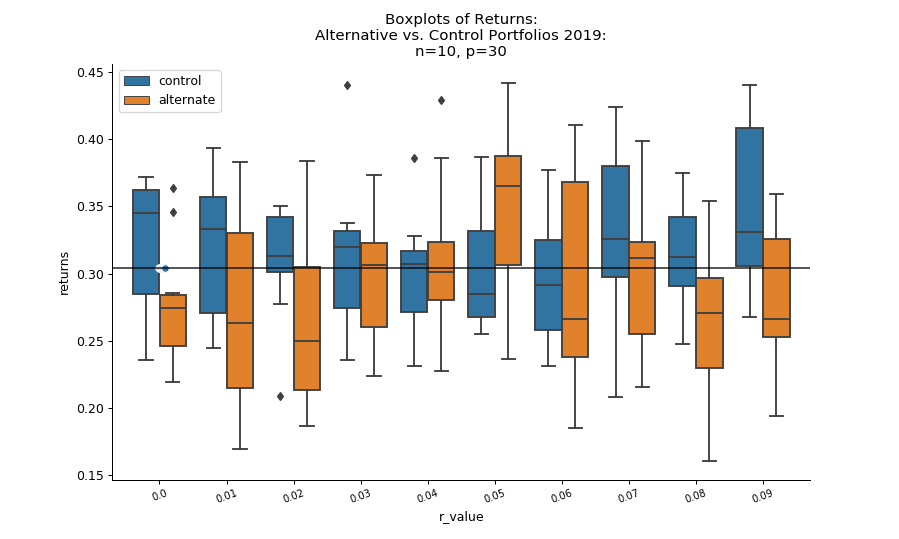

<IPython.core.display.Javascript object>


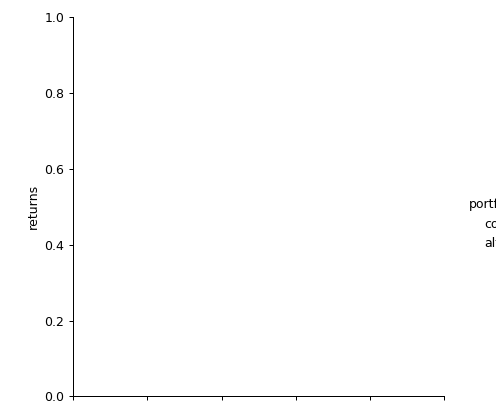

In [129]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.catplot(ax=ax, data=melted_df, kind='box', x='r_value', y='returns', hue='portfolio') 
           #inner='quartile', #inner='stick', 
            #split=False, 
            #alpha=0.5)
            #cut=0)
sns.scatterplot(ax=ax, data = sp_df, x='r_value', y='returns')#, hue='portfolio')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Boxplots of Returns:\nAlternative vs. Control Portfolios 2019:\nn={}, p={}'.format(n_samples, portfolio_size))
ax.tick_params(axis="x", labelsize=8, rotation=20)
ax.axhline(return_sp19, color='black', alpha=0.7)
ax.set_ylim(0, 0.1)
#plt.savefig("plots\\boxplot_ac1.png")
#ax.savefig('plots\\boxplot_ac1.png')

# Combine the Loop with the graph

In [211]:
r_thresholds = [0, 0.02, 0.04, 0.06, 0.08] ## threshold value compared to market
portfolio_size = [10, 20, 30, 40, 50] ## number of stocks in each portfolio
n_samples = [20, 30, 40, 50] ### number of bootstraps of sample_size=portfolio size 

comparison_df = pd.DataFrame([])

#pd.DataFrame(comparison_dic, index=['sample1'])

for threshold in r_thresholds:
    """generate/sample symbols"""
    for size in portfolio_size:
        for sample_size in n_samples:
            n_bootstraps = sample_size
            for i in range(n_bootstraps):
                comparison_dic = {}
                alt_list = []
                control_list = []

                for symbol in full_companies:
                    temp_series = worst_days_returns08[symbol]
                    if temp_series-return_sp08 > threshold:
                        alt_list.append(symbol)
                    else:
                        control_list.append(symbol)

                #print(len(alt_list),len(control_list))

                alt_symbols = random.sample(alt_list, size)
                control_symbols = random.sample(control_list, size)

                ### Generage Beginning/End Prices of the portfolios
                alt_close18 = df_price18.loc[:, alt_symbols].loc['2018-12-31', :]
                alt_close19 = df_price19.loc[:, alt_symbols].loc['2019-12-31', :]
                ctl_close18 = df_price18.loc[:, control_symbols].loc['2018-12-31', :]
                ctl_close19 = df_price19.loc[:, control_symbols].loc['2019-12-31', :]
                ### generate returns
                alt_return = (sum(alt_close19)-sum(alt_close18))/sum(alt_close18)
                ctl_return = (sum(ctl_close19)-sum(ctl_close18))/sum(ctl_close18)

                comparison_dic['control'] = ctl_return,
                comparison_dic['alternate'] = alt_return
                comparison_dic['r_value'] = threshold
                comparison_dic['sample_size'] = n_bootstraps
                comparison_dic['portfolio_size'] = size
                temp_df = pd.DataFrame(comparison_dic)

                comparison_df = pd.concat([comparison_df, temp_df])

comparison_df

,control,alternate,r_value,sample_size,portfolio_size
0,0.307685,0.377641,0.00,20,10
0,0.320798,0.291031,0.00,20,10
0,0.382305,0.137038,0.00,20,10
0,0.441933,0.296352,0.00,20,10
0,0.365904,0.149736,0.00,20,10
...,...,...,...,...,...
0,0.267835,0.314997,0.08,50,50
0,0.388129,0.266653,0.08,50,50
0,0.267431,0.280942,0.08,50,50
0,0.268087,0.247297,0.08,50,50


In [212]:
# n_samples = [10, 20, 20, 30, 40] #  number of bootstraps
# portfolio_size = [10, 20, 30, 40] ## number of stocks in each portfolio

In [213]:
# np.array(range(subplot_size)).reshape(5,4)

In [214]:
# subplot_size = len(portfolio_size)*len(n_samples)
# #fig, ax = plt.subplots(1,1, figsize=(10,6))
# idx_matrix = np.array(range(subplot_size)).reshape(len(n_samples),len(portfolio_size))
# idx_matrix

In [215]:
# fig, ax = plt.subplots(len(n_samples), len(portfolio_size), figsize=(15,10))
# plt.tight_layout()

<IPython.core.display.Javascript object>


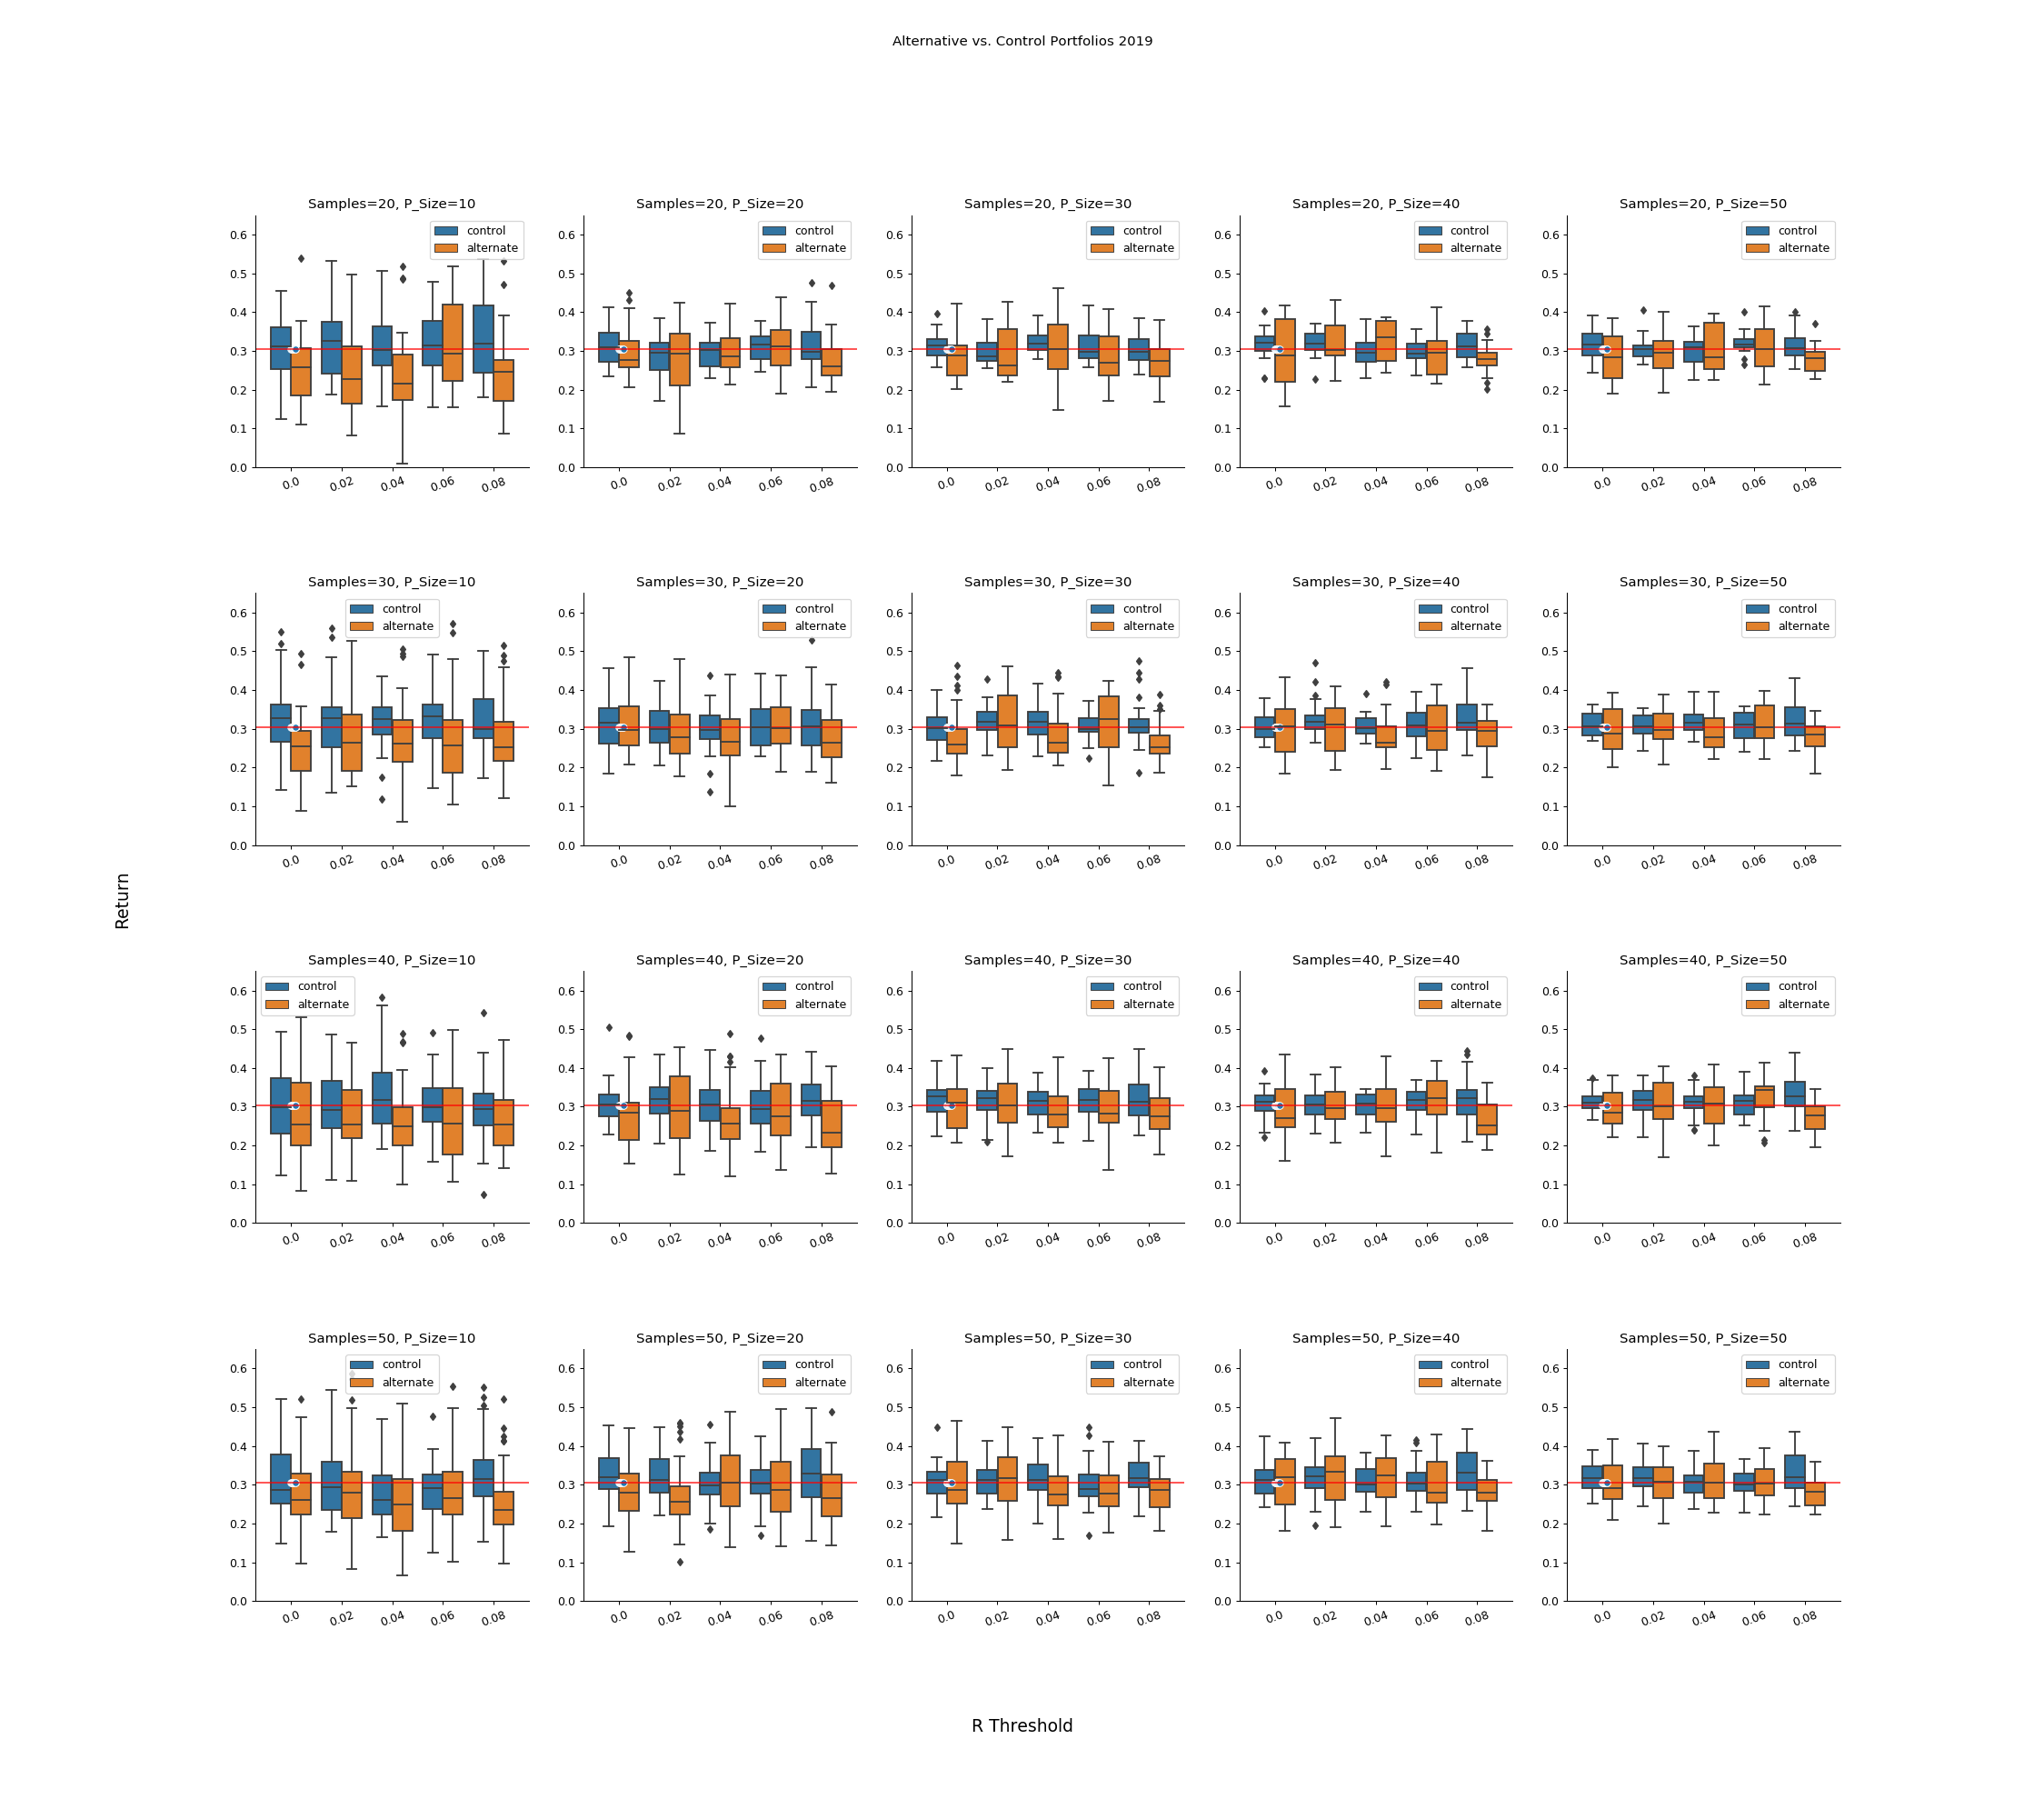

<IPython.core.display.Javascript object>


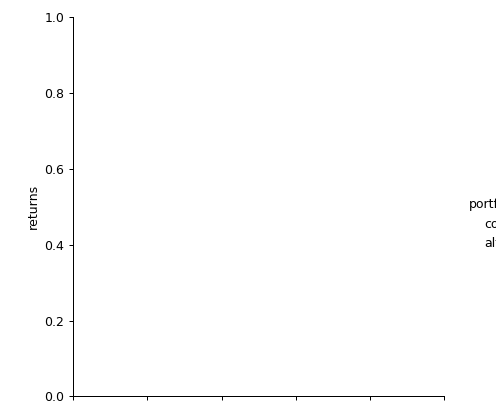

<IPython.core.display.Javascript object>


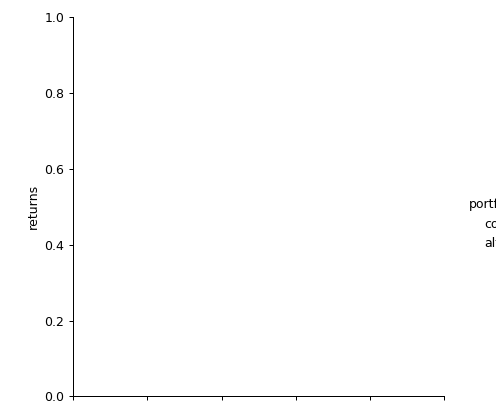

<IPython.core.display.Javascript object>


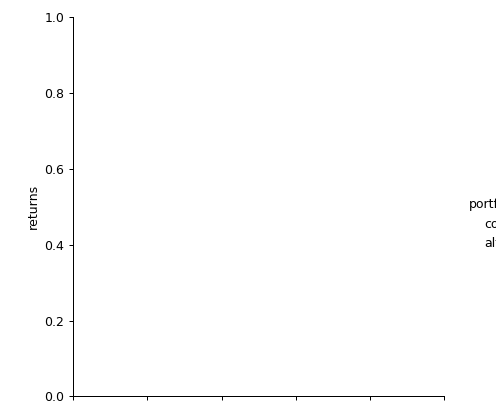

<IPython.core.display.Javascript object>


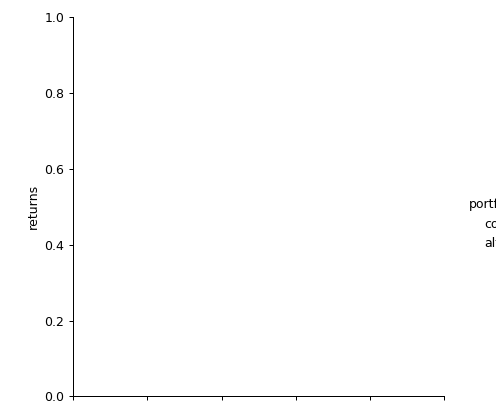

<IPython.core.display.Javascript object>


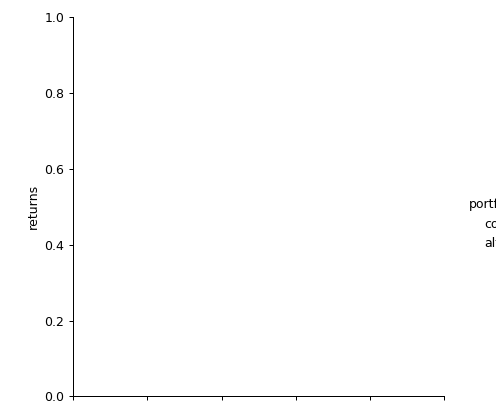

<IPython.core.display.Javascript object>


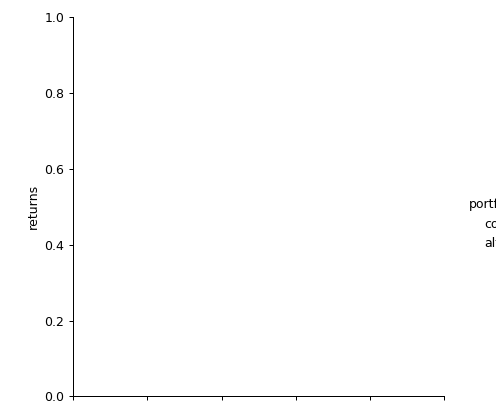

<IPython.core.display.Javascript object>


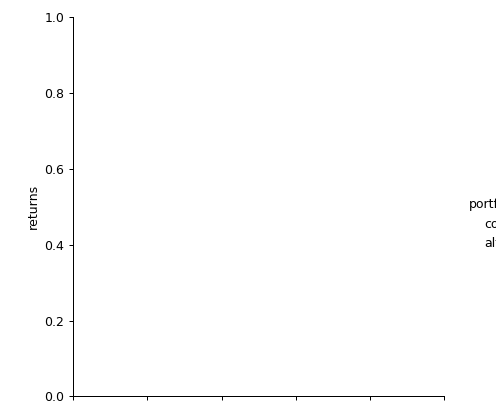

<IPython.core.display.Javascript object>


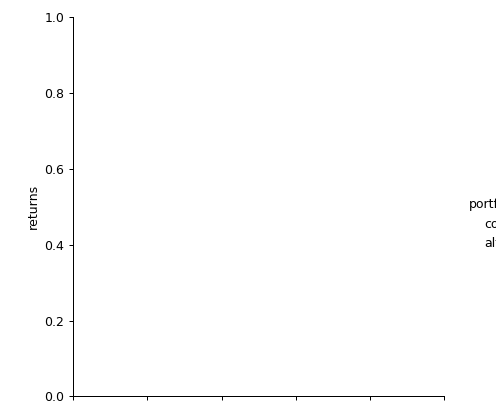

<IPython.core.display.Javascript object>


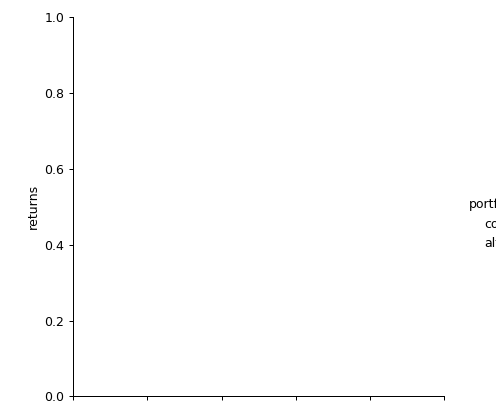

<IPython.core.display.Javascript object>


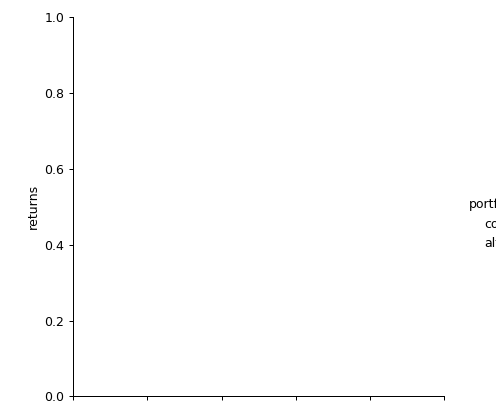

<IPython.core.display.Javascript object>


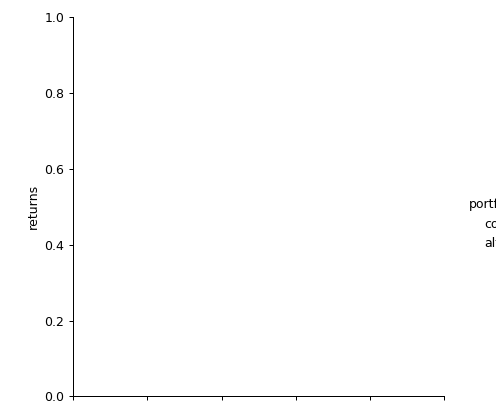

<IPython.core.display.Javascript object>


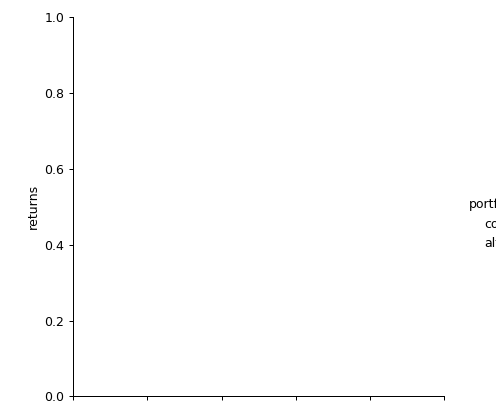

<IPython.core.display.Javascript object>


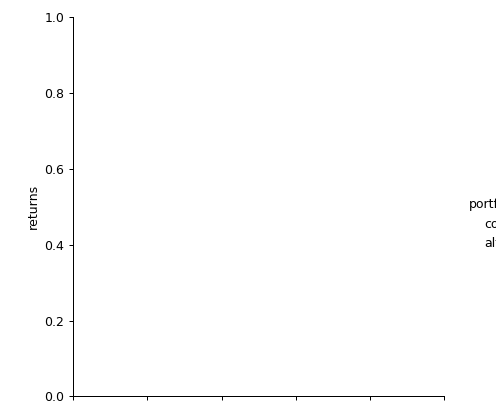

<IPython.core.display.Javascript object>


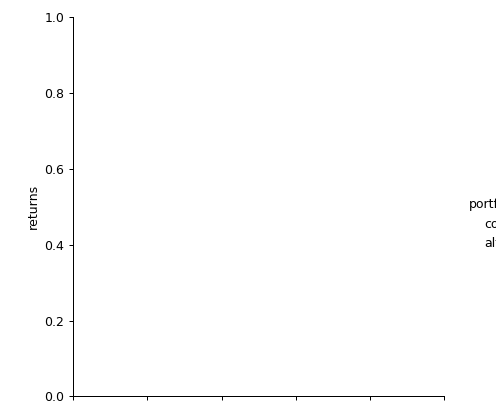

<IPython.core.display.Javascript object>


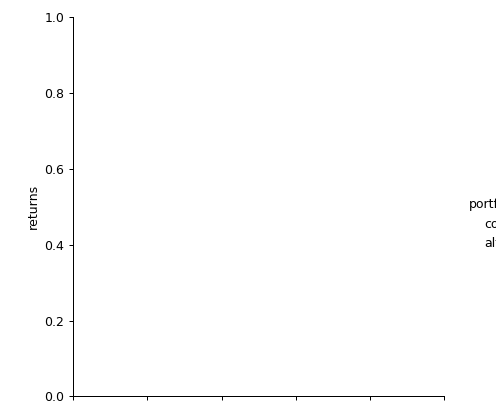

<IPython.core.display.Javascript object>


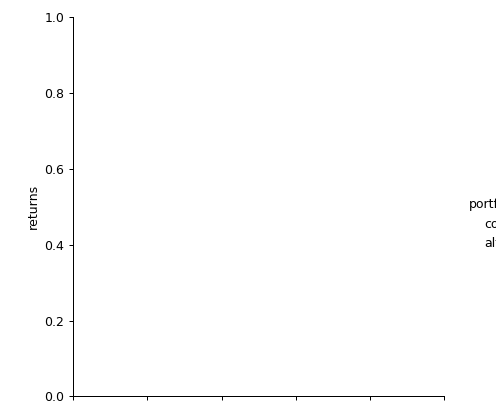

<IPython.core.display.Javascript object>


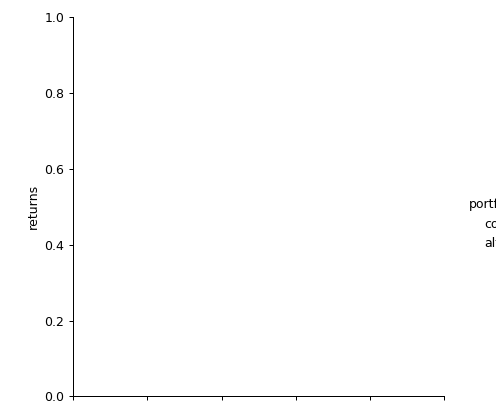

<IPython.core.display.Javascript object>


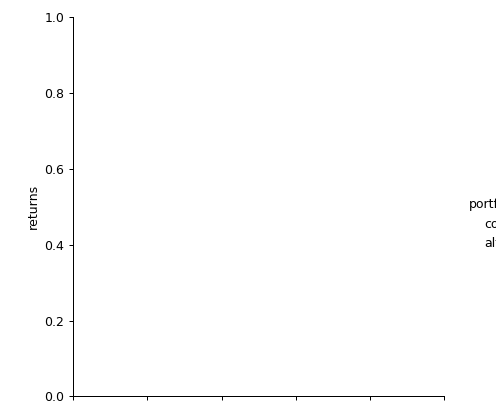

C:\PROGRA1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


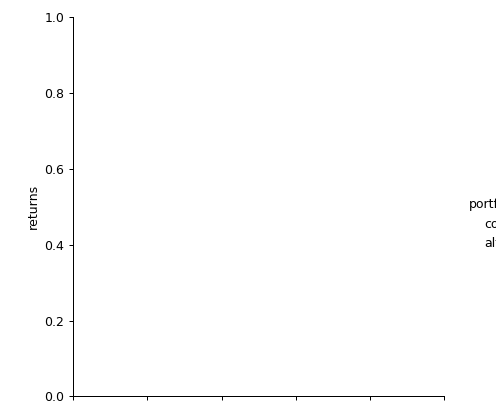

C:\PROGRA1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


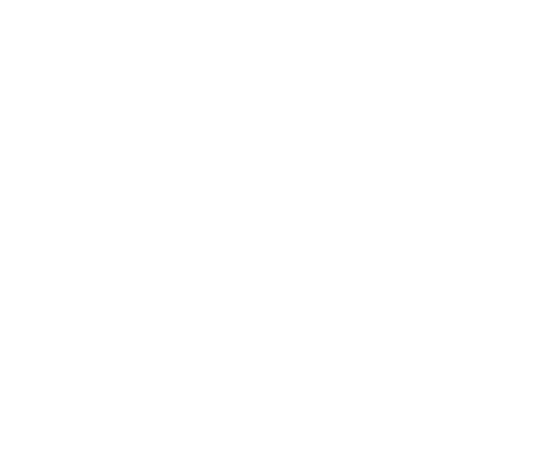

In [216]:
subplot_size = len(portfolio_size)*len(n_samples)
fig, ax = plt.subplots(len(n_samples), len(portfolio_size), figsize=(25,22))
idx_matrix = np.array(range(subplot_size)).reshape(len(n_samples),len(portfolio_size))

for i in range(len(n_samples)):
    for j in range(len(portfolio_size)):
        
        sample_size = n_samples[i]
        p_size = portfolio_size[j]
        temp_axis = ax[i,j]
        
        temp_df = comparison_df[(comparison_df['sample_size']==sample_size) & (comparison_df['portfolio_size']==p_size)]
        melted_df = pd.melt(temp_df,id_vars=['r_value', 'sample_size', 'portfolio_size'], value_vars=['control', 'alternate'],
                    var_name = 'portfolio', value_name='returns')

        sns.catplot(ax=temp_axis, data=melted_df, kind='box', x='r_value', y='returns', hue='portfolio') 
                   #inner='quartile', #inner='stick', 
                    #split=False, 
                    #alpha=0.5)
                    #cut=0)
        sns.scatterplot(ax=temp_axis, data = sp_df, x='r_value', y='returns')#, hue='portfolio')

        temp_axis.spines['top'].set_visible(False)
        temp_axis.spines['right'].set_visible(False)
        temp_axis.set_xlabel('')
        temp_axis.set_ylabel('')        
        
#         temp_axis.get_xaxis().set_ticks([])
#         temp_axis.get_yaxis().set_ticks([])        
        
        temp_axis.set_title('Samples={}, P_Size={}'.format(sample_size, p_size))
        temp_axis.tick_params(axis="x", rotation=20)
        temp_axis.axhline(return_sp19, color='red', alpha=0.7)
        temp_axis.set_ylim(0, 0.65)


fig.suptitle('Alternative vs. Control Portfolios 2019')
fig.text(0.5, 0.04, 'R Threshold', ha='center', va='center', fontsize=15)
fig.text(0.06, 0.5, 'Return', ha='center', va='center', rotation='vertical', fontsize=15)
fig.subplots_adjust(hspace=0.5)        
plt.tight_layout()
plt.close()
plt.show()

In [ ]:
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", ci=None);

In [153]:
# temp_df = comparison_df[(comparison_df['sample_size']==10) & (comparison_df['portfolio_size']==30)]
# temp_df.drop_duplicates()

In [154]:
# melted_df = pd.melt(temp_df,id_vars=['r_value', 'sample_size', 'portfolio_size'], value_vars=['control', 'alternate'],
#                     var_name = 'portfolio', value_name='returns')
# melted_df

In [155]:
# print(melted_df['r_value'].value_counts())
# print(melted_df['sample_size'].value_counts())
# print(melted_df['portfolio_size'].value_counts())
# print(melted_df['portfolio'].value_counts())

In [ ]:
comparison_df = pd.DataFrame(comparison_dic, index=['SP', 'CTL', 'ALT'])
comparison_df

In [ ]:
# comparison_df.to_csv('data\\external\\comparison_2019.csv')

In [87]:
# sp_dates_data = pd.DataFrame(comparison_df.loc['SP'])
# sp_dates_data['date'] = sp_dates_data.index
# sp_dates_data['date'] = sp_dates_data['date'].astype(str)
# sp_dates_data.columns = ['returns', 'date']
# sp_dates_data['portfolio'] = 'SP'
# sp_dates_data

In [ ]:
ctl_dates_data = pd.DataFrame(comparison_df.loc['CTL'])
ctl_dates_data['date'] = ctl_dates_data.index
ctl_dates_data['date'] = ctl_dates_data['date'].astype(str)
ctl_dates_data.columns = ['returns', 'date']
ctl_dates_data['portfolio'] = 'CTL'
ctl_dates_data

In [ ]:
alt_dates_data = pd.DataFrame(comparison_df.loc['ALT'])
alt_dates_data['date'] = alt_dates_data.index
alt_dates_data['date'] = alt_dates_data['date'].astype(str)
alt_dates_data.columns = ['returns', 'date']
alt_dates_data['portfolio'] = 'ALT'
alt_dates_data

In [ ]:
total_dates_data = pd.concat([sp_dates_data, ctl_dates_data, alt_dates_data], axis=0)
total_dates_data

### Returns

In [ ]:
alt_ret19 = df_returns19.loc[worst_dates_sp19.index, alt_symbols]#.sort_values(by =df_returns19.index )
#alt_ret19.loc[worst_dates_sp19.index, :]
alt_ret19

In [ ]:
ctl_ret19 = df_returns19.loc[worst_dates_sp19.index, control_symbols]
ctl_ret19

## Total DataFrame

In [ ]:
temp_alt = alt_ret19.T
temp_alt['portfolio'] = 'alt'

temp_ctl = ctl_ret19.T
temp_ctl['portfolio'] = 'ctl'

total_df = pd.concat([temp_alt, temp_ctl])

#total_df

In [ ]:
total_df['company'] = total_df.index
total_df.columns = [str(total_df.columns[i]).split(' ')[0] for i in range(len(total_df.columns))]
total_df.head()

In [ ]:
melt_cols = [str(total_df.columns[i]).split(' ')[0] for i in range(6)]
id_vars = ['company', 'portfolio']

In [ ]:
melted_df = pd.melt(total_df, id_vars=id_vars, value_vars=date_cols, var_name = 'date', value_name='returns')
melted_df = melted_df.sort_values(by='date')
melted_df.head()

In [ ]:
# print(melted_df['date'].value_counts())
# print(melted_df['portfolio'].value_counts())

In [ ]:
# total_df[total_df['portfolio']=='alt'].loc[:, '2019-08-23']

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,6))
sns.catplot(ax=ax, data=melted_df, kind='violin', x='date', y='returns', hue='portfolio', 
           inner='quartile', #inner='stick', 
            split=False, alpha=0.5, cut=0)
# sns.scatterplot(ax=ax, data=sp_dates_data, x='date', y='returns', color='black')
# sns.scatterplot(ax=ax, data=ctl_dates_data, x='date', y='returns', color='blue')
# sns.scatterplot(ax=ax, data=alt_dates_data, x='date', y='returns', color='red')
sns.scatterplot(ax=ax, data = total_dates_data, x='date', y='returns', hue='portfolio')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Boxplots of Returns:\nAlternative vs. Control Portfolios\n5 Worst Market Trading Days 2019')
ax.tick_params(axis="x", labelsize=8, rotation=20)
ax.set_ylim(-0.18, 0.1)
#plt.savefig("plots\\boxplot_ac1.png")
#ax.savefig('plots\\boxplot_ac1.png')

## Generate the Boxplot of the Returns (5 worst dates of control portfolio)

### Plot of Sigma ~ Expected Returns of Alternative Portfolio and Control Portfolios